In [1]:
import os
import sys
import urllib.request
import time 
from selenium import webdriver
from selenium.webdriver.common.alert import Alert
from selenium.webdriver.support.select import Select
import pandas as pd
from bs4 import BeautifulSoup
import json
import xmltodict

In [4]:
url = "https://www.google.com/"
driver = webdriver.Chrome("./driver/chromedriver") # windows .exe 
driver.get(url)

some_tag = driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div[2]/div[2]/input")
some_tag.send_keys("weather")
path = "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[3]/center/input[1]"
driver.find_element_by_xpath(path).click()


In [5]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
H = soup.select('#wob_wc > div.UQt4rd > div.wtsRwe > div:nth-child(1)')
W = soup.select('#wob_wc > div.UQt4rd > div.wtsRwe > div:nth-child(3)')
P = soup.select('#wob_wc > div.UQt4rd > div.wtsRwe > div:nth-child(2)')

<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="utf-8"/><meta content="dark" name="color-scheme"/><meta content="origin" name="referrer"/><meta content="Anb2GUnhMjfTIX0D2a4a6NPAqPI5GaxxRAiF81XTjHJ2qK4E3Hw3VFM4eaJBgRzz45CNPt624audv+wHOJwfAAEAAABieyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IlRydXN0VG9rZW5zIiwiZXhwaXJ5IjoxNjI2MjIwNzk5LCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>weather - Google 검색</title><script async="" nonce="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.h3Hb0D_ghuM.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo8HKYs3uYwO3D8vrT9sPLRNofSg0A/cb=gapi.loaded_0"></script><script nonce="">(function(){
var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:'94fdYcHyHZPahwPe343ADw'
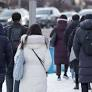
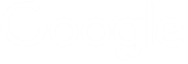

In [6]:
print(soup)

In [7]:
Humidity = '강수확률:' + ' ' + str(H)[-16: -14].strip()
print(Humidity)




강수확률: 0%


In [8]:
WindSpeed = '바람속도:' + ' ' + str(W)[-25:-21].strip()
print(WindSpeed)

바람속도: 2m/s


In [9]:
P

[<div>습도: <span id="wob_hm">48%</span></div>]

In [10]:
Precipitation= '강수확률:' + ' ' + str(P)[-17:-14].strip()
print(Precipitation)

강수확률: 48%


In [12]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
tmp_info = soup.select('#wob_tm')
temper = '현재온도:'+ ' ' + str(tmp_info)[-11:-8].strip() + '도'
print(temper)

현재온도: -10도


In [11]:
import telegram


bot = telegram.Bot(token = '')
chat_id = 5022326393

bot.sendMessage(chat_id = chat_id, 
text = '{}\n{}\n{}\n{}'.format(temper, Precipitation, WindSpeed, Humidity ))

In [13]:
driver.quit()

In [2]:
!python temperature.py

In [3]:
import os
import sys
import urllib.request
import time 
from selenium import webdriver
from selenium.webdriver.common.alert import Alert
from selenium.webdriver.support.select import Select
import pandas as pd
from bs4 import BeautifulSoup
import json
import xmltodict
import telegram 

url = "https://www.google.com/"
driver = webdriver.Chrome("./driver/chromedriver") # windows .exe 
driver.get(url)
some_tag = driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div[2]/div[2]/input")
some_tag.send_keys("weather")
path = "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[3]/center/input[1]"
driver.find_element_by_xpath(path).click()
driver.implicitly_wait(5) # 페이지 다 뜰 때 까지 기다림


soup = BeautifulSoup(driver.page_source, 'html.parser')
time.sleep(0.6)
H = soup.select('#wob_wc > div.UQt4rd > div.wtsRwe > div:nth-child(1)')
time.sleep(0.6)
W = soup.select('#wob_wc > div.UQt4rd > div.wtsRwe > div:nth-child(3)')
time.sleep(0.6)
P = soup.select('#wob_wc > div.UQt4rd > div.wtsRwe > div:nth-child(2)')
tmp_info = soup.select('#wob_tm')
time.sleep(0.6)
location = '현재 서울특별시 중구 약수역 날씨정보'
temper = '현재온도:'+ ' ' + str(tmp_info)[-11:-7].strip() + '도'
Humidity = '강수확률:' + ' ' + str(H)[-16: -14].strip()
WindSpeed = '바람속도:' + ' ' + str(W)[-25:-21].strip()
Precipitation= '강수확률:' + ' ' + str(P)[-17:-14].strip()

bot = telegram.Bot(token = '')
chat_id = 5022326393
bot.sendMessage(chat_id = chat_id, text = '{}\n{}\n{}\n{}\n{}'.format(location, temper, Precipitation, WindSpeed, Humidity ))

driver.quit()